# Linear Model Assumptions

Linear regression assumptions are:

* Linearity: The mean values of the outcome variable for each increment of the predictor(s) lie along a straight line. In other words, there is a linear relationship between predictors and target.

* No perfect multicollinearity: There should be no perfect linear relationship between two or more of the predictors.

* Normally distributed errors: the residuals are random and normally distributed with a mean of 0.

* Homoscedasticity: At each level of the predictor variable(s), the variance of the residual terms should be constant.

Examples of linear models are:

* Linear and Logistic Regression

* Linear Discriminant Analysis (LDA)

**Failure to meet one or more of the model assumptions could end up in a poor model performance.**

If the assumptions are not met, we can:

* Use a different, no-linear model to predict the outcome from the variables.

* Transform the input variables so that they meet the assumptions.



In [1]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# for linear regression
from sklearn.linear_model import LinearRegression

# to split and standardize the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate the regression model
from sklearn.metrics import mean_squared_error

In [2]:
# load the the Boston house price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

C:\Users\tamal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# The aim is to predict the "Median house value (price)" which is the MEDV column.

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Linear model

In [4]:
# To train and evaluate a model, let's first split the data into train and test data, using 3 variables:
# LSTAT, RM and CRIM

# Let's separate the data into training and testing sets using a sklearn function.

X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [5]:
# Let's scale the features.
# This is a normal procedure for linear models.

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [6]:
# Let's train a linear model.

# Instantiate a lineear model.
linreg = LinearRegression()

# Train the model.
linreg.fit(scaler.transform(X_train), y_train)

# Make predictions on the train set and calculate
# the mean squared error.
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# Make predictions on the test set and calculate
# the mean squared error.
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 28.603232128198893
Test set
Linear Regression mse: 33.20006295308441



### Residuals

Residuals are the difference between the observed value and the predicted value.

In [7]:
# Calculate the residuals.

error = y_test - pred

## Residuals distribution

<AxesSubplot: xlabel='MEDV', ylabel='Count'>

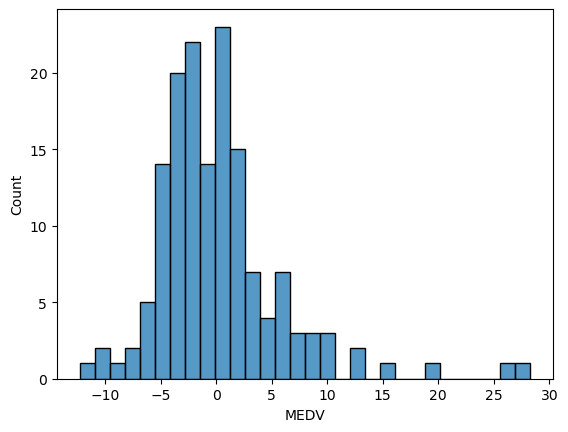

In [8]:
sns.histplot(error, bins=30)

The residuals show a "fairly" normal distribution centered at 0. Not perfect, though. By visual inspection, there is some skew towards the left, with a few higher values towards the right of the distribution.

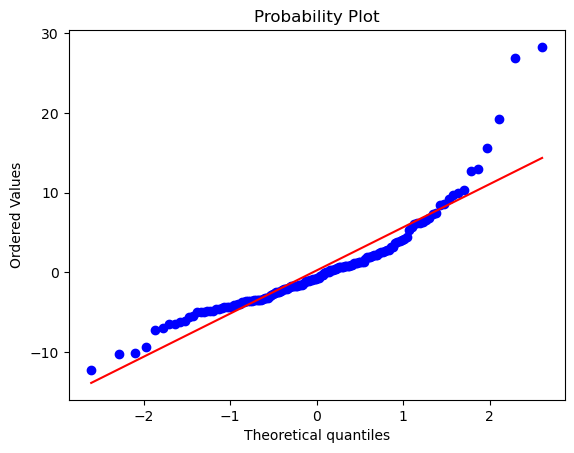

In [9]:
# Q-Q plots. If the residuals are normally distributed
# the dots should adjust to the 45 degree line.

stats.probplot(error, dist="norm", plot=plt)
plt.show()

## Homoscedasticity

Homoscedasticity implies that the variance of the residual terms should be constant at each level of the predictor variable(s).So we need to plot the residuals against the variables.

Homoscedasticity, also known as homogeneity of variance, describes a situation in which the error term (that is, the "noise" in the relationship between the independent variables and the target) is the same across all values of the independent variables.

The way to identify if the variables are homoscedastic, is to make a linear model with all the independent variables involved, calculate the residuals, and plot the residuals vs. each of the independent variables. If the distribution of the residuals is homogeneous across the variable values, then the variables are homoscedastic.

There are other tests for homoscedasticity:

* Residuals plot

* Levene’s test

* Barlett’s test

* Goldfeld-Quandt Test

Text(0, 0.5, 'Residuals')

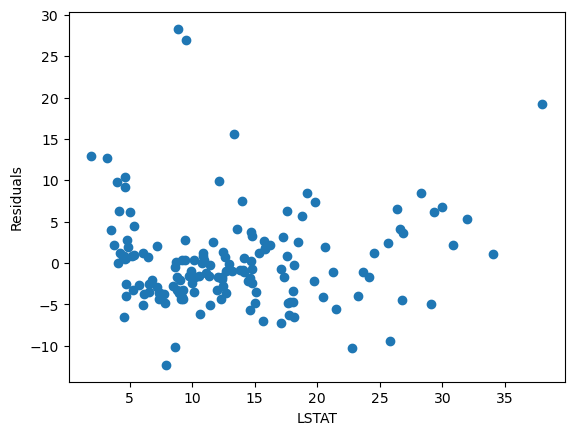

In [10]:
# Plot the residuals vs. one of the independent variables, LSTAT in this case.

plt.scatter(x=X_test['LSTAT'], y=error)
plt.xlabel('LSTAT')
plt.ylabel('Residuals')

The residuals seem fairly homogeneously distributed across the values of LSTAT.

Text(0, 0.5, 'Residuals')

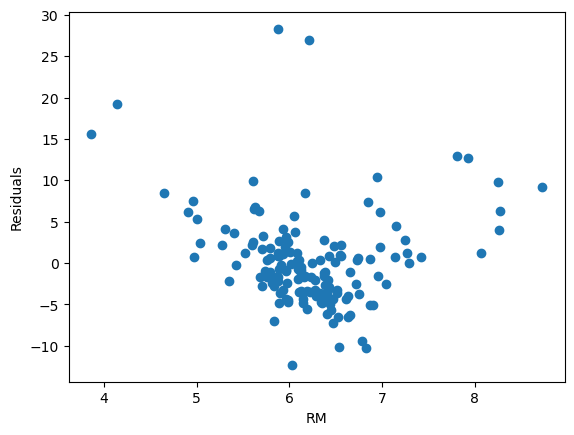

In [11]:
# Let's plot the residuals vs. RM.

plt.scatter(x=X_test['RM'], y=error)
plt.xlabel('RM')
plt.ylabel('Residuals')

For this variable, the residuals do not seem to be homogeneously distributed across the values of RM. In fact, low and high values of RM show higher error terms.

Text(0, 0.5, 'Residuals')

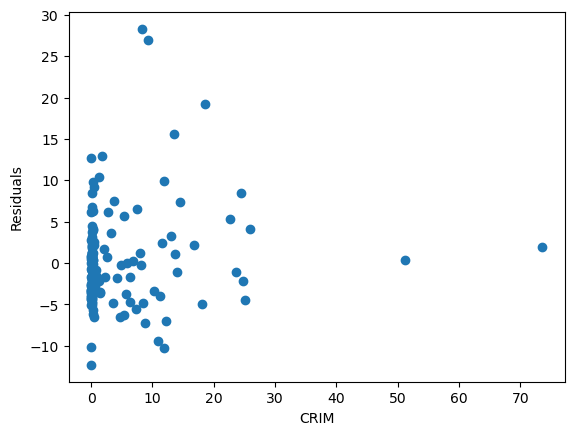

In [12]:
# Plot the residuals vs. one of the independent
# variables, CRIM in this case.

plt.scatter(x=X_test['CRIM'], y=error)
plt.xlabel('CRIM')
plt.ylabel('Residuals')

### Residual analysis with Yellowbrick

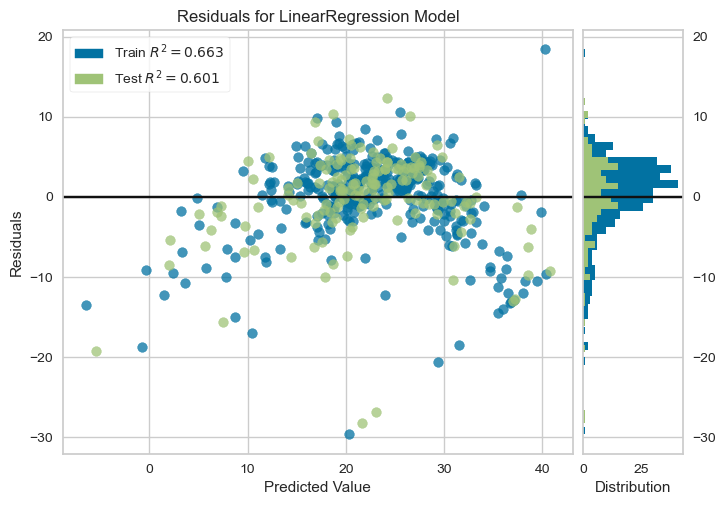

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [13]:
from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

### Improving model fit

In [14]:
import scipy.stats as stats

# Apply the box-cox transformation to the variables.
boston['LSTAT'], _ = stats.boxcox(boston['LSTAT'])
boston['CRIM'], _ = stats.boxcox(boston['CRIM'])
boston['RM'], _ = stats.boxcox(boston['RM'])

# Let's separate the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [15]:
# Let's scale the features.

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [16]:
# Model trained with the transformed variables.

# The model.
linreg = LinearRegression()

# Fit the model.
linreg.fit(scaler.transform(X_train), y_train)

# Make predictions and calculate the mean squared
# error over the train set.
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# Make predictions and calculate the mean squared
# error over the test set.
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse: 25.020138527672213
Test set
Linear Regression mse: 29.70979354458992



## Residuals

In [17]:
# Calculate the residuals.

error = y_test - pred

<AxesSubplot: xlabel='MEDV', ylabel='Count'>

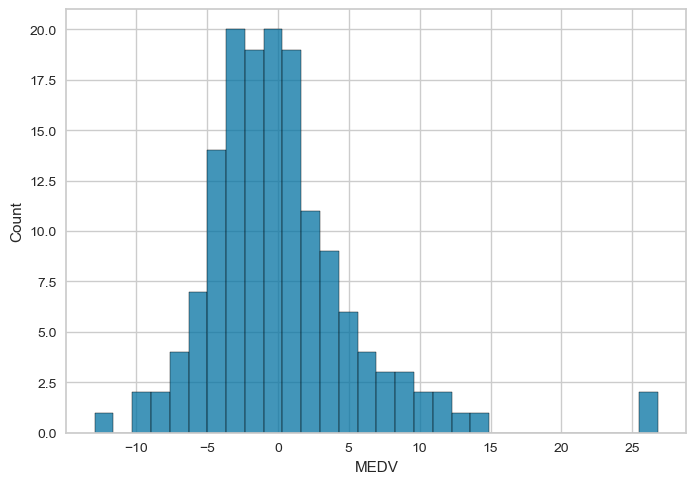

In [18]:
sns.histplot(error, bins=30)

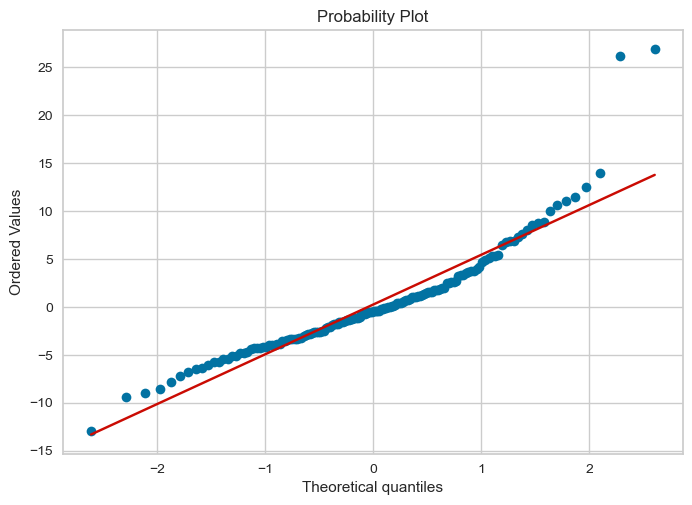

In [19]:
# Analise the residuals distribution with a Q-Q plot. If the residuals are normally distributed
# the dots should follow the 45 degree line.

stats.probplot(error, dist="norm", plot=plt)
plt.show()

The residuals are normally distributed after transforming our variables.

## Yellowbrick

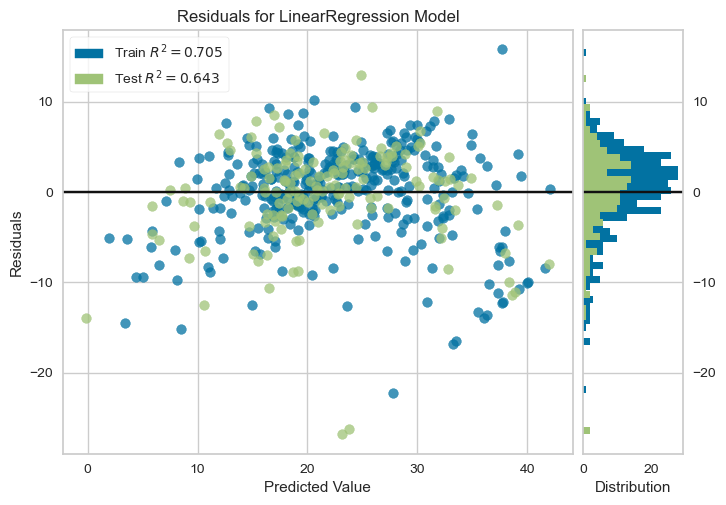

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [20]:
# Let's now do the analysis with yellowbrick.

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

## Other model assumptions

In [21]:
np.random.seed(29) # for reproducibility

n = 200
x = np.random.randn(n)
y = x * 10 + np.random.randn(n) * 2

toy_df = pd.DataFrame([x, y]).T
toy_df.columns = ['x', 'y']
toy_df.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


## Linear relationship

### Scatter plots

Text(0.5, 31.999999999999986, 'Independent variable')

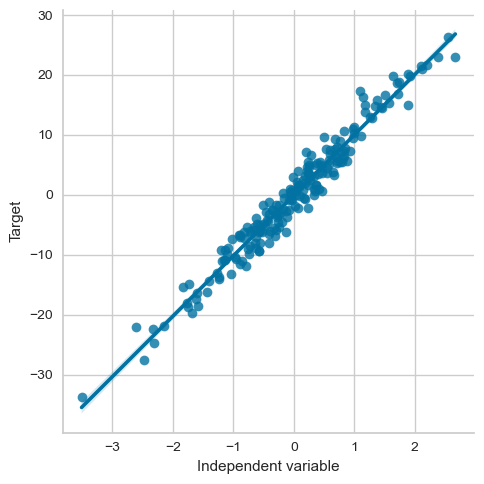

In [22]:
# This is how the plot looks like when
# there is a linear relationship.

sns.lmplot(x="x", y="y", data=toy_df, order=1)
# order 1 indicates that we want seaborn to
# estimate a linear model (the line in the plot below)
# between x and y.

plt.ylabel('Target')
plt.xlabel('Independent variable')

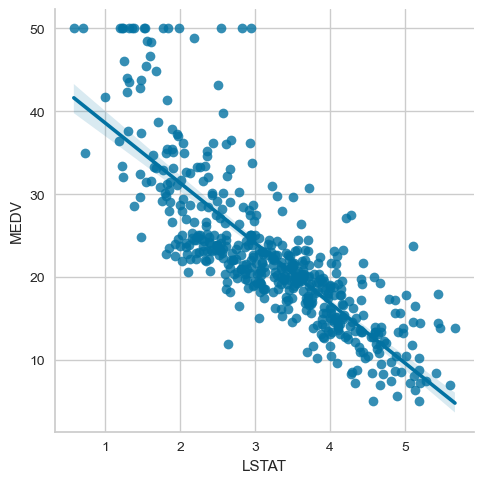

In [23]:
sns.lmplot(x="LSTAT", y="MEDV", data=boston, order=1)

The relationship between LSTAT and MEDV is fairly linear apart from a few values around the minimal values of LSTAT, towards the top left part of the plot.

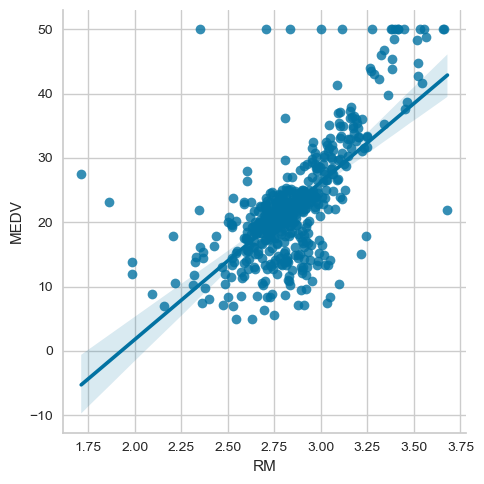

In [24]:
# plot RM (average number of rooms per dwelling)
# vs. MEDV (median value of the house).

sns.lmplot(x="RM", y="MEDV", data=boston, order=1)

The relationship between the target and the transformed RM is not linear. 

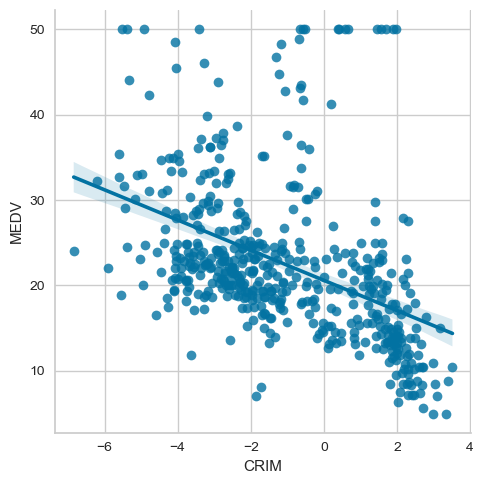

In [25]:
# plot CRIM (per capita crime rate by town)
# vs. MEDV (median value of the house).

sns.lmplot(x="CRIM", y="MEDV", data=boston, order=1)

The relationship is also not perfectly linear between CRIM and MEDV, but it does go in that way.

Text(0, 0.5, 'Real value')

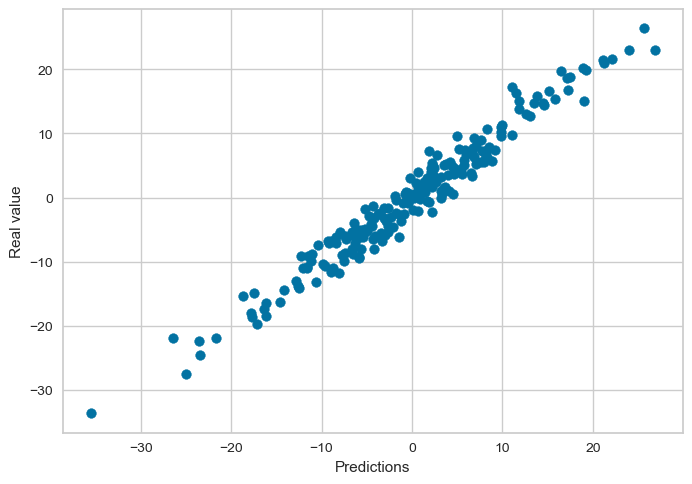

In [26]:
# Toy dataset.

# Step 1: train a linear model.
linreg = LinearRegression()

# Fit the model.
linreg.fit(toy_df['x'].to_frame(), toy_df['y'])

# Step 2: obtain the predictions.
pred = linreg.predict(toy_df['x'].to_frame())

# Step 3: calculate the residuals.
error = toy_df['y'] - pred

# Plot predicted vs real values.
plt.scatter(x=pred, y=toy_df['y'])
plt.xlabel('Predictions')
plt.ylabel('Real value')

Text(0.5, 0, 'Independent variable x')

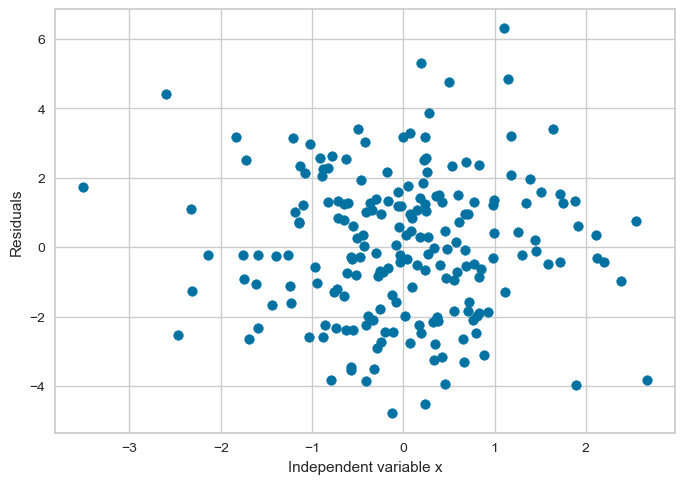

In [27]:
# Step 4: examine the distribution of the errors.
plt.scatter(y=error, x=toy_df['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

The errors are distributed around 0, as expected.

Text(0.5, 0, 'Residuals')

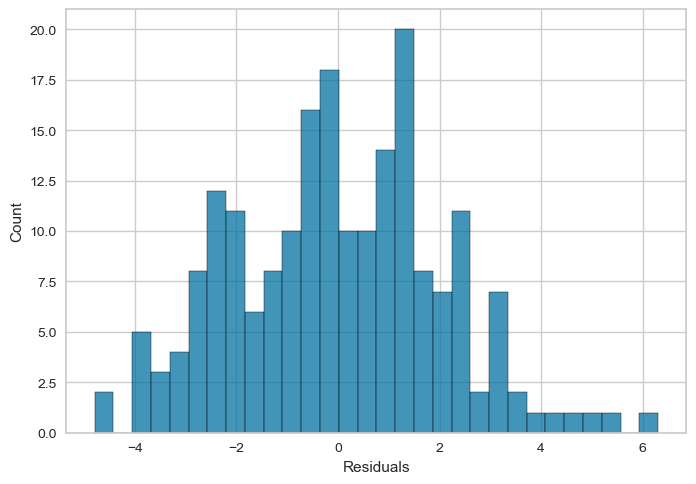

In [28]:
# Step 4: examine the distribution of the errors.

sns.histplot(error, bins=30)
plt.xlabel('Residuals')

The errors show a Gaussian distribution centered around 0. So the variable meets the assumptions of the model.

Text(0, 0.5, 'MEDV')

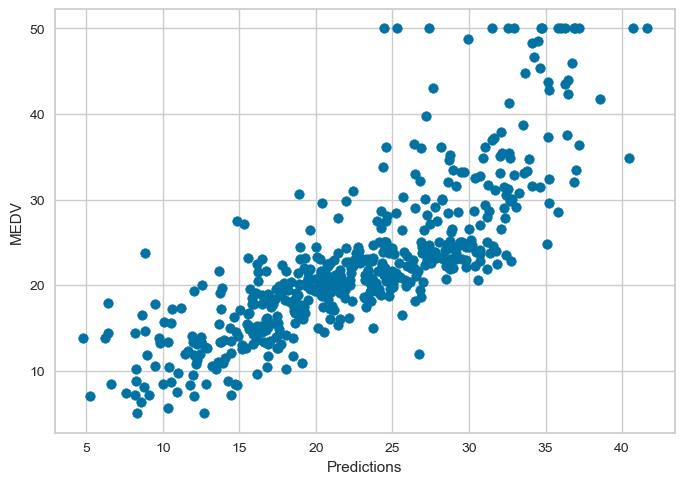

In [29]:
# The linear model from sklearn.
linreg = LinearRegression()

# Fit the model.
linreg.fit(boston['LSTAT'].to_frame(), boston['MEDV'])

# Make the predictions.
pred = linreg.predict(boston['LSTAT'].to_frame())

# Calculate the residuals.
error = boston['MEDV'] - pred

# Plot predicted vs real values.
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Predictions')
plt.ylabel('MEDV')

Most of the predictions are close to the real values. However, the model does not predict very well towards the highest house prices. For high house prices, the model under-estimates the price.

Text(0.5, 0, 'LSTAT')

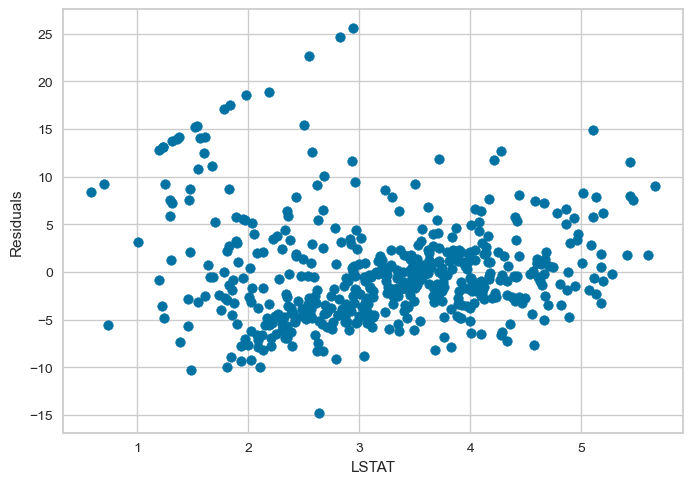

In [30]:
# Residuals plot.

# If the relationship is linear, the residuals should be
# random, centered at zero, and follow a normal distribution.

plt.scatter(y=error, x=boston['LSTAT'])
plt.ylabel('Residuals')
plt.xlabel('LSTAT')

The residuals are not really centered at zero. The errors are not homogeneously distributed across the values of LSTAT. Low and high values of LSTAT show higher errors.

The relationship could be improved.

<AxesSubplot: xlabel='MEDV', ylabel='Count'>

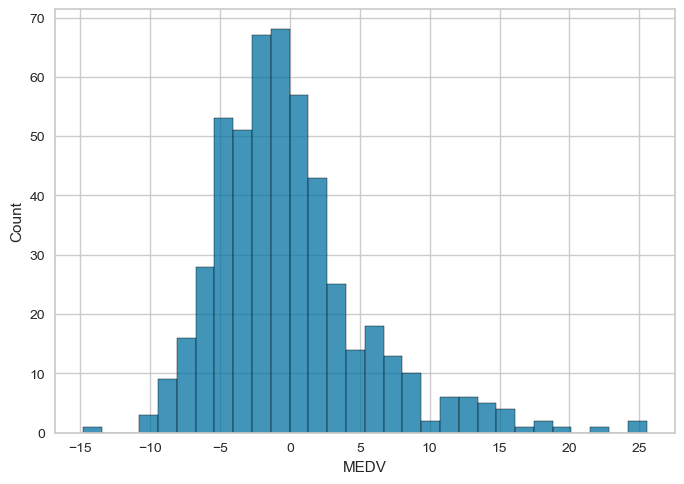

In [31]:
# Plot a histogram of the residuals.

sns.histplot(error, bins=30)

The residuals are not centered around zero, and the distribution is not normal.

## Multicolinearity

To determine co-linearity, we evaluate the correlation of independent variables.

In [32]:
# Capture features in a list.

features = boston_dataset.feature_names

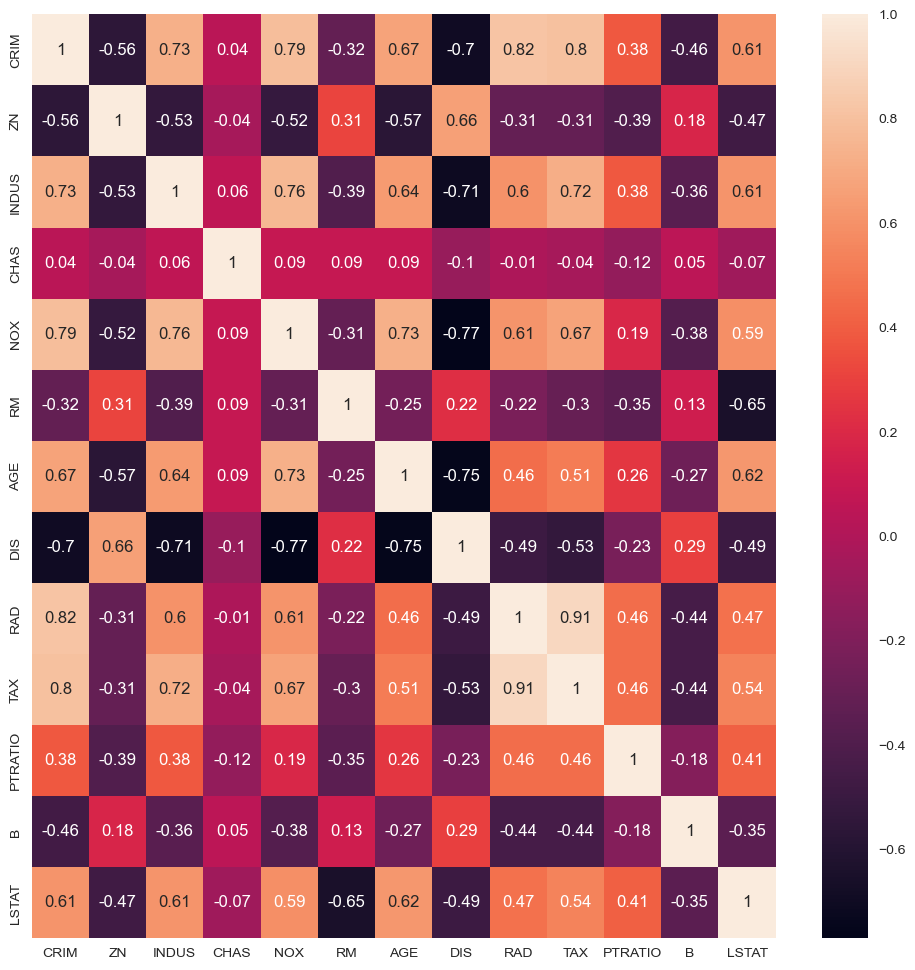

In [33]:
correlation_matrix = boston[features].corr().round(2)

# Plot the correlation matrix usng seaborn.
# use annot = True to print the correlation values
# inside the squares.

figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True);

On the x and y axis of the heatmap, we see the variables of the Boston House dataframe. Within each square, the correlation value between those 2 variables is indicated. For example, for LSTAT vs CRIM at the bottom left of the heatmap, we see a correlation of 0.46. These two variables are not highly correlated.

Instead, for the variables RAD and TAX (try and find them in the plot), the correlation is 0.91. These variables are highly correlated. The same is true for the variables NOX and DIS, which show a correlation value of -0.71.

Let's see how they look in a scatter plot.

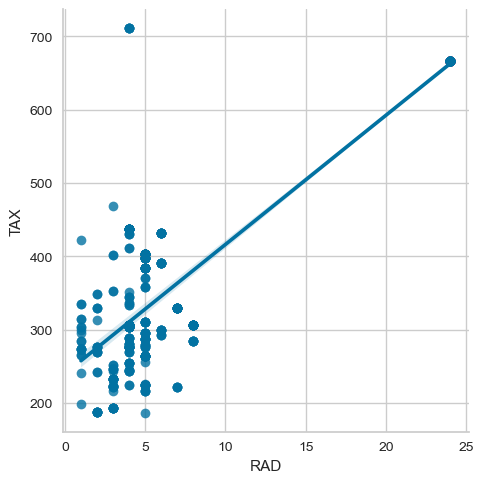

In [34]:
# Correlation between RAD (index of accessibility to radial highways)
# and TAX (full-value property-tax rate per $10,000).

sns.lmplot(x="RAD", y="TAX", data=boston, order=1)

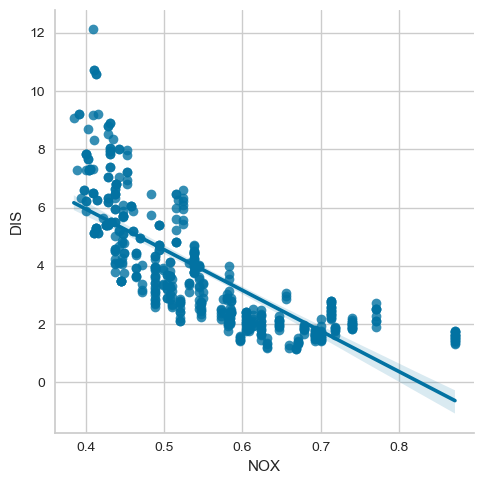

In [35]:
# Correlation between NOX (itric oxides concentration (parts per 10 million))
# and DIS (weighted distances to five Boston employment centres).

sns.lmplot(x="NOX", y="DIS", data=boston, order=1)

The correlation, or co-linearity between NOX and DIS, is quite obvious in the scatter plot. So these variables are violating the assumption of no multi co-linearity.

# Outliers
An outlier is a data point that is significantly different from the remaining data.

"An outlier is an observation that deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism."

`Should outliers be removed?`

Depending on the context, outliers either deserve special attention or should be ignored. Take the example of revenue forecasting: if unusual spikes of revenue are observed, it's probably a good idea to pay extra attention to them and figure out what caused the spike. In the same way, an unusual transaction on a credit card might be a sign of fraudulent activity, which is what the credit card issuer wants to prevent. So, in instances like these, it is useful to look for and investigate further the outlier values.

If outliers are, however, introduced by mechanical or measurement error, it is a good idea to remove these outliers before training the model. Why? because some algorithms are sensitive to outliers.

### Machine learning models and outliers
Some machine learning models are sensitive to outliers. For instance, AdaBoost may treat outliers as "hard" cases and put tremendous weights on them, thus producing a model with poor generalisation.

Linear models, in particular linear regression, can also be sensitive to outliers.

Decision trees-based models are robust to outliers. Decision trees make decisions by asking if variable x is >= than a certain value, and therefore the outlier will fall on each side of the equation, but it will be treated similarly to non-outlier values.

A research article suggests that neural networks could also be sensitive to outliers, provided the number of outliers is high and the deviation is also high. I would argue that if the number of outliers is high (> 15% as suggested in the article), then they are no longer outliers, but rather a fair representation of that variable. A link to this article can be found in the "Additional reading resources" lecture at the end of this section of the course.

### Extreme Value Analysis
The most basic form of outlier detection is Extreme Value Analysis of 1-dimensional data. The key to this method is to determine the statistical tails of the underlying distribution of the variable and then find the values that sit at the very end of the distribution.

If the variable is normally distributed (Gaussian), then the values that lie outside the mean, plus or minus 3 times the standard deviation of the variable, are considered outliers.

* outliers = mean +/- 3* std.

  If the variable is skewed, a general approach is to calculate the quantiles, and then the inter-quartile range (IQR):

* IQR = 75th quantile - 25th quantile

  An outlier will sit outside the following upper and lower boundaries:

* Upper boundary = 75th quantile + (IQR * 1.5)

* Lower boundary = 25th quantile - (IQR * 1.5)

or for extreme cases:

* Upper boundary = 75th quantile + (IQR * 3)

* Lower boundary = 25th quantile - (IQR * 3)

In [36]:
# Print information for boston dataset.

from sklearn.datasets import load_boston

print(load_boston().DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\tamal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

# boston house dataset for the demo
from sklearn.datasets import load_boston

In [38]:
# Load the Boston House prices dataset from sklearn
boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]


boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [39]:
# Load the titanic dataset.

titanic = pd.read_csv('titanic.csv',
                      usecols=['age', 'fare'])


titanic.dropna(subset=['age', 'fare'], inplace=True)

titanic.head()

,age,fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500


## Variable distribution
In normally distributed variables, outliers are those values that lie beyond the mean, plus or minus 3 times the standard deviation. If the variables are skewed, however, we find outliers using the inter-quantile range. In order to decide which method to use to detect outliers, we first need to know the distribution of the variable.

We can use histograms and Q-Q plots to determine if the variable is normally distributed. We can also use boxplots to directly visualise the outliers. Boxplots are a standard way of displaying the distribution of a variable, utilising the first quartile, the median, the third quartile, and the whiskers.

Looking at a boxplot, you can easily identify:

* The median, indicated by the line within the box.

* The inter-quantile range (IQR), the box itself.

* The quantiles, the 25th (Q1) is the lower and the 75th (Q3) the upper end of the box.

* The wiskers, which extend to:

-- top whisker: Q3 + 1.5 x IQR

-- bottom whisker: Q1 -1.5 x IQR

Any value sitting outside the whiskers is considered an outlier.

In [40]:
# Function to create a histogram, a Q-Q plot and a boxplot.


def diagnostic_plots(df, variable):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

### Normally distributed variables

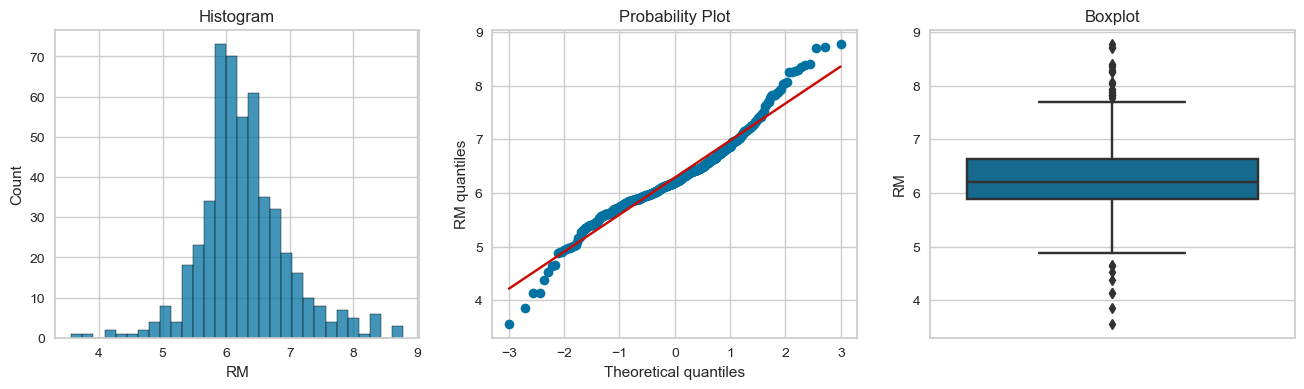

In [41]:
# Let's begin with the variable RM from the
# boston house dataset.

# RM is the average number of rooms per dwelling.

diagnostic_plots(boston, 'RM')

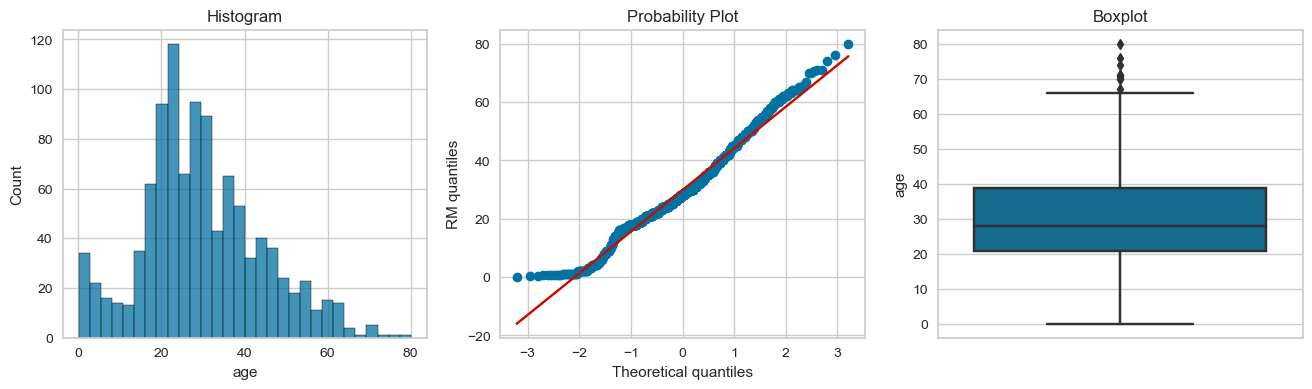

In [42]:
# Let's inspect the variable Age from the Titanic.

diagnostic_plots(titanic, 'age')

## Skewed variables

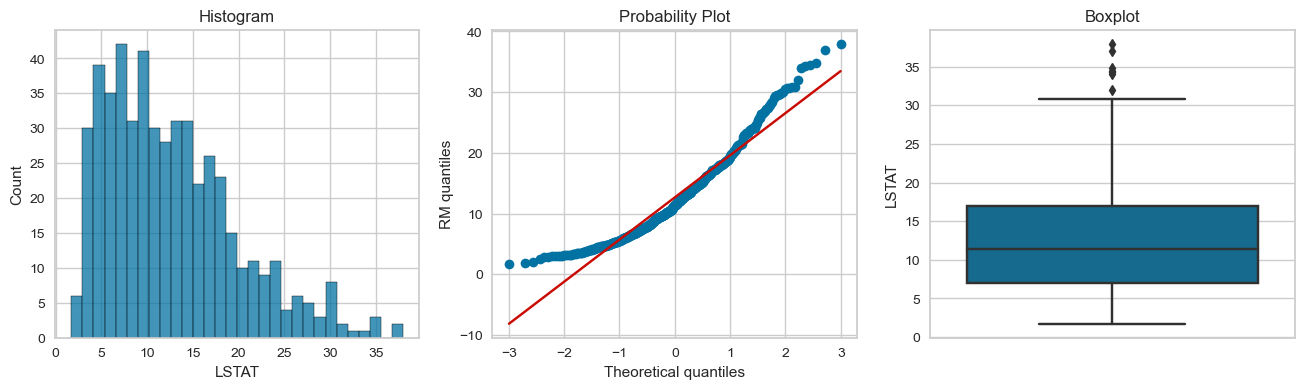

In [43]:
# Variable LSTAT from the boston house prices dataset.
# LSTAT is the % lower status of the population.

diagnostic_plots(boston, 'LSTAT')

LSTAT is not normally distributed, it is skewed with a tail to the right. According to the boxplot, there are some outliers at the right end of the distribution.

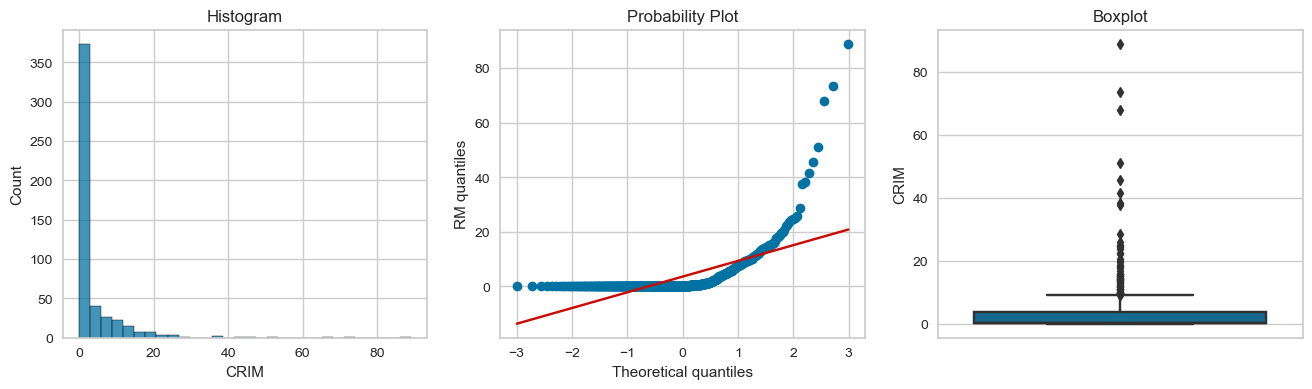

In [44]:
# Variable CRIM from the boston house prices dataset.
# CRIM is the per capita crime rate by town.

diagnostic_plots(boston, 'CRIM')

CRIM is heavily skewed, with a tail to the right. According to the boxplot, there are a few outliers at the right end of the distribution.

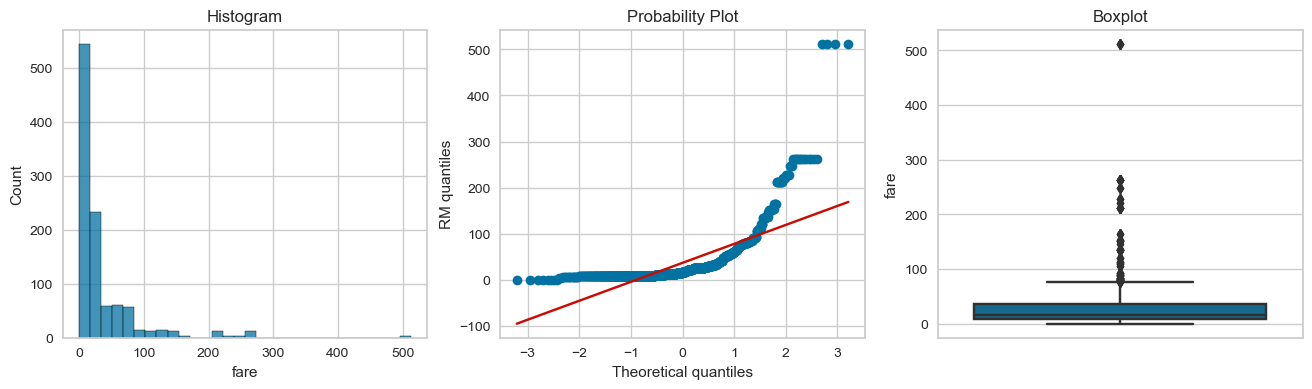

In [45]:
# Variable Fare from the Titanic dataset.
# Fare is the ticket price.

diagnostic_plots(titanic, 'fare')

Fare is also highly skewed, and shows some unusual values at the right end of its distribution.

## Outlier detection

### Normally distributed variables

In [46]:
# Function to find upper and lower boundaries
# for normally distributed variables.


def find_normal_boundaries(df, variable):

    # Calculate the boundaries
    # for a Gaussian distribution.

    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [47]:
# calculate boundaries for RM

upper_boundary, lower_boundary = find_normal_boundaries(boston, 'RM')
upper_boundary, lower_boundary

(8.392485817597757, 4.176782957105816)

Values bigger than 8.4 or smaller than 4.2 occur very rarely in RM. Therefore,consider them outliers.

In [48]:
# Inspect the number and percentage of outliers in RM.

print('total number of houses: {}'.format(len(boston)))

print('houses with more than 8.4 rooms (right end outliers): {}'.format(
    len(boston[boston['RM'] > upper_boundary])))

print('houses with less than 4.2 rooms (left end outliers: {}'.format(
    len(boston[boston['RM'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(boston[boston['RM'] > upper_boundary]) / len(boston)))

print('% left end outliers: {}'.format(
    len(boston[boston['RM'] < lower_boundary]) / len(boston)))

total number of houses: 506
houses with more than 8.4 rooms (right end outliers): 4
houses with less than 4.2 rooms (left end outliers: 4

% right end outliers: 0.007905138339920948
% left end outliers: 0.007905138339920948


Using Extreme Value Analysis we identified outliers at both ends of the distribution of RM. The percentage of outliers is small (1.4% considering the 2 tails together).

Let's move on to Age from the titanic dataset.

In [49]:
# Calculate boundaries for Age.

upper_boundary, lower_boundary = find_normal_boundaries(titanic, 'age')
upper_boundary, lower_boundary

(73.01943709155127, -13.31576876619241)

The upper boundary is 73 years, which means that passengers older than 73 were rare in the titanic. The lower boundary is negative. Because negative age does not exist, it only makes sense to look for outliers using the upper boundary.

In [50]:
# Let's look at the number and percentage of outliers.

print('total passengers: {}'.format(len(titanic)))

print('passengers older than 73: {}'.format(
    len(titanic[titanic['age'] > upper_boundary])))
print()
print('% of passengers older than 73: {}'.format(
    len(titanic[titanic['age'] > upper_boundary]) / len(titanic)))

total passengers: 1045
passengers older than 73: 3

% of passengers older than 73: 0.0028708133971291866


### Skewed variables

In [51]:
# Function to find upper and lower boundaries for skewed variables.


def find_skewed_boundaries(df, variable, distance):

    # calculate the boundaries for skewed distributions

    # The parameter "distance" gives us the option to
    # estimate 1.5 times or 3 times the IQR when defining
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [52]:
# For LSTAT in the boston house prices dataset.

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'LSTAT', 1.5)
upper_boundary, lower_boundary

(31.962500000000006, -8.057500000000005)

In [53]:
# Let's look at the number and percentage of outliers for LSTAT.

print('total houses: {}'.format(len(boston)))

print('houses with LSTAT bigger than 32: {}'.format(
    len(boston[boston['LSTAT'] > upper_boundary])))
print()
print('% houses with LSTAT bigger than 32: {}'.format(
    len(boston[boston['LSTAT'] > upper_boundary])/len(boston)))

total houses: 506
houses with LSTAT bigger than 32: 7

% houses with LSTAT bigger than 32: 0.01383399209486166


The upper boundary is ~32. The lower boundary is negative. However, the variable LSTAT does not take negative values. Thus, outliers in LSTAT will only be found beyond the upper boundary. Outliers were only found at the right tail of LSTAT's distribution.

In [54]:
# Find outliers with the IQR.
# Here, IQR * 3

upper_boundary, lower_boundary = find_skewed_boundaries(boston, 'CRIM', 3)
upper_boundary, lower_boundary

(14.462195000000001, -10.7030675)

In [55]:
# Let's look at the number and percentage of outliers for CRIM.

print('total houses: {}'.format(len(boston)))

print('houses with CRIM bigger than 14: {}'.format(
    len(boston[boston['CRIM'] > upper_boundary])))
print()
print('% houses with CRIM bigger than 14s: {}'.format(
    len(boston[boston['CRIM'] > upper_boundary]) / len(boston)))

total houses: 506
houses with CRIM bigger than 14: 30

% houses with CRIM bigger than 14s: 0.05928853754940711


In [56]:
# Finally, identify outliers in Fare. 
#  IQR * 3.

upper_boundary, lower_boundary = find_skewed_boundaries(titanic, 'fare', 3)
upper_boundary, lower_boundary

(117.85, -74.3)

In [57]:
# Let's look at the number and percentage of passengers
# who paid extremely high Fares.

print('total passengers: {}'.format(len(titanic)))

print('passengers who paid more than 117: {}'.format(
    len(titanic[titanic['fare'] > upper_boundary])))
print()
print('% passengers who paid more than 117: {}'.format(
    len(titanic[titanic['fare'] > upper_boundary])/len(titanic)))

total passengers: 1045
passengers who paid more than 117: 67

% passengers who paid more than 117: 0.06411483253588517
